# <center> 02807 - Computational Tools for Data Science </center>


# <center> Week 2 <center>

# <center> Today <center>
    
 * Introduction to the course
 * Numerical Computation with **NumPy**

# <center> About the teacher <center>

* Andrés (Pronunciation: [anˈdɾes]). 
* aocc@dtu.dk.
* Lecturer at DTU Compute.
* Did my PhD studies at DTU Compute (AI).
* Teaching:
    * 01019 Discrete Mathematics.
    * 02180 Introduction to Artificial Intelligence.
    * 02285 Artificial Intelligence and Multi-agent systems.

# <center> Introduction to the course </center>


# <center> What is data science? </center>

* The scientific study of data (well, duh!). 

* It involves **storing, manipulating and analyzing data to extract useful information**. 

* **Goal**: gain insights and knowledge from data — both structured and unstructured.

# <center> A fundamentally inter-disciplinary subject </center>
>Data science comprises three distinct and overlapping areas: 
>
> the **skills of a statistician** who knows how to **model and summarize datasets** (which are growing ever larger); 
>
><span style="color:red"> the **skills of a computer scientist** who can **design and use algorithms to efficiently store, process, and visualize this data** </span>; 
>
> and the **domain expertise**—what we might think of as "classical" training in a subject—necessary both to formulate the right questions and to put their answers in context.

Source: Python Data Science Handbook

# <center> The data science life cycle </center>

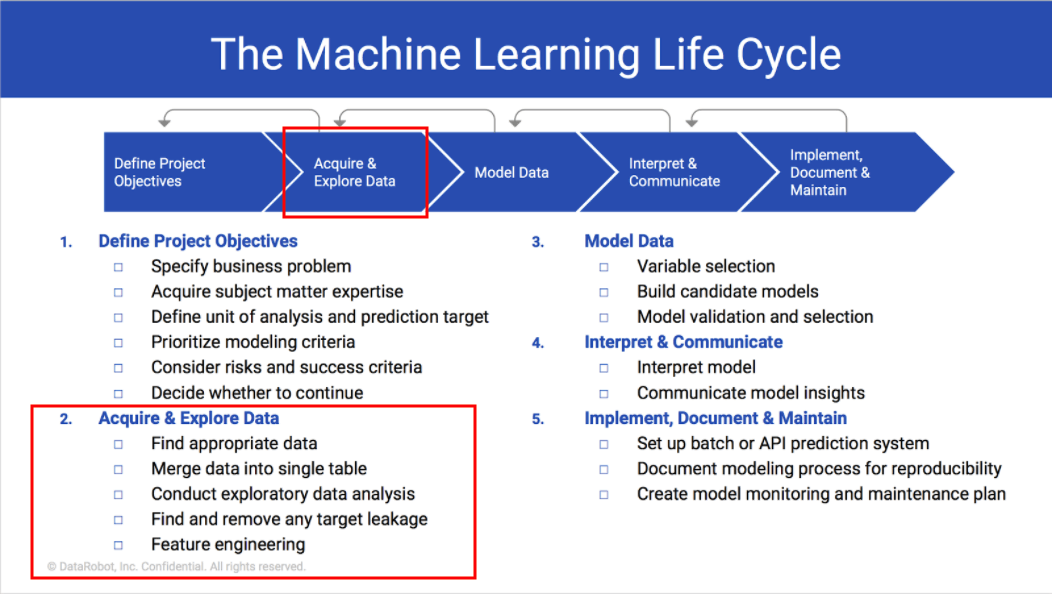

# </center> Focus of the course <center>
    
    
* In this course, you will learn about:
    * **state-of-the-art computational tools and techniques for working with data at scale**

* **Course topics**:
    * Interactively developing and presenting data science projects with Jupyter/Colab notebooks
    * Fundamental data science tools in Python: NumPy, Pandas, Matplotlib, etc.
    * Streaming, relational databases, parallel computation, etc. 



* The focus is on **practical hand-on experience**.
    
* Aimed at a **diverse, cross-disciplinary audience**: 
    * Your classmates come from: Diploma, BSc and MSc in AI, CS, business analytics, engineering, bioinformatics, mathematical modelling, software technology, and more!

# <center> Numerical computation with NumPy </center>


* *The rest of the notebook contains excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

# <center> Understanding Data Types in Python </center>

* Effective data-driven science and computation requires understanding how data is stored and manipulated.

* How arrays of data are handled in the Python language itself, and how NumPy improves on this.

# <center> Data types </center>

* Users of Python are often drawn-in by its **ease of use**.

* One reason for ease of use: *dynamic typing*

* *Data type*: attribute of data which tells the compiler or interpreter how the programmer intends to use the data.

* Examples of data types: integers (`34`), floating points (`1.4`), Booleans (`True`), characters (`h`), strings (`hello`)...

# <center> Static vs. dynamic typing </center>

* A *statically-typed* language like C or Java requires each variable to be explicitly declared.
* Example. In C: 

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

* A *dynamically-typed language* like Python skips this specification (types are **dynamically inferred**). This means that you **can program a little quicker** because you do not have to specify types every time.

* Equivalent operation in Python:

```python
# Python code
result = 0
for i in range(100):
    result += i
```


* In Python, we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

* Here we've switched the contents of ``x`` from an integer to a string. 

* The same thing in C would lead (depending on compiler settings) to a compilation error or other unintented consequences:

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

* This sort of **flexibility** is one piece that makes Python and other dynamically-typed languages convenient and easy to use.

* Understanding *how* this works is an important piece of learning to analyze data efficiently and effectively with Python.

# <center> A Python Integer Is More Than Just an Integer </center>

* The standard Python implementation is written in C.

* Every Python object is simply a cleverly-disguised C structure, which contains not only its value, but other information as well. 

* An integer in Python, such as ``x = 10000``, ``x`` is not just a "raw" integer. 



* A single integer in Python 3.4 actually contains four pieces:

    * ``ob_refcnt``, a reference count to handle memory allocation and deallocation
    * ``ob_type``, **encodes the type of the variable**
    * ``ob_size``, specifies the size of the following data members
    * ``ob_digit``, **contains the actual integer value** being represented.


```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

# <center> A trade-off between convenience and efficiency </center>

* We incur some **overhead** in storing an integer in Python as compared to an integer in C.

* Extra information in the Python integer structure allows Python to be coded so freely and dynamically.

* This comes at a **cost**: as we run the program, we have to spend time figuring out
    * what type of data we are dealing with: "is it a `char` or an `int`?"
    * looking up whether we can do the operations we want to do on the data, given its type: "is addition defined for this data type? If so, what does it do?"
    * requires type-checking or duck typing, function dispatches, etc.

# <center> A Python List Is More Than Just a List </center>

* **List**: standard mutable multi-element container in Python.

* Stores a sequence of Python objects.

* We can create a list of integers as follows:

In [ ]:
L = list(range(10))
L

In [ ]:
type(L[0])

Or, similarly, a list of strings:

In [ ]:
L2 = [str(c) for c in L]
L2

In [ ]:
type(L2[0])

Because of Python's dynamic typing, we can even create **heterogeneous lists**:

In [ ]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

* This flexibility comes at a cost
* To allow these flexible types: need to store and deal with type information for each object (`ob_type`, etc.)
* In the special case that **all data is of the same type**, much of this information is **redundant**
* **More efficient**: store data in a **fixed-type array**.

# <center> Fixed-Type Arrays in Python </center>


* The built-in ``array`` module (available since Python 3.3) can be used to create dense arrays of a uniform type:


In [ ]:
import array
L = list(range(10))
A = array.array('i', L)
A

*``'i'`` is a type code indicating the contents are integers.

* **Much more useful**: ``ndarray`` object of the NumPy package.

* Python's ``array`` object provides efficient storage of array-based data

* NumPy adds to this efficient **operations** on that data.

* **Much more efficient for storing and manipulating homogeneous data** than Python lists.

# <center> Quick look at NumPy </center>

In [ ]:
import numpy as np

## Creating Arrays from Python Lists

* First, we can use ``np.array`` to create arrays from Python lists:

In [ ]:
# integer array:
np.array([1, 4, 2, 5, 3])

* If we want to explicitly set the data type of the resulting array, we can use the ``dtype`` keyword:

In [ ]:
np.array([1, 2, 3, 4], dtype='float32')

* Unlike Python lists, NumPy arrays can explicitly be **multi-dimensional**

In [ ]:
# nested lists result in multi-dimensional arrays
x = np.array([range(i, i + 3) for i in [2, 4, 6]])
x
print(x)
print("type of data:", x.dtype)
print("dimensions:", x.ndim)
print("size:",x.size)

# <center> Creating Arrays from Scratch </center>

* Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.


In [ ]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

In [ ]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

# <center> NumPy Standard Data Types </center>


| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

# <center> NumPy array manipulation and computation</center>

Several useful operatation implemented efficiently:
    
* accessing data in the array
* reshaping the array
* copying the array
* slicing, concatenating, splitting arrays
* aggregating data to generate summary statistics
* extracting values satisfying a condition (masking)
* indexing, sorting, etc.

See the accompanying notebooks of the Python Data Science Handbook for examples and details. [A Visual Intro to NumPy and Data Representation](http://jalammar.github.io/visual-numpy/) is a great for visualising these operations.

# <center> The key to optimising your NumPy code: `ufuncs` and vectorisation </center>


* **Computation on NumPy arrays can be very fast, or it can be very slow**

* The key to making it fast is to use **vectorized operations**, implemented through NumPy's **universal functions** (`ufuncs`).

# <center> The Slowness of Loops </center>

* Python loops can be *sluggish*: type-checking, function dispatches (recall the convenience vs efficiency trade-off)

* All the type-checking and related *overhead* adds up when many small operations are being repeated.

* Creates a *scalability problem*

# <center> Example: computing reciprocals </center>

* Example: imagine we an array of values and we'd like to compute the reciprocal of each. 

* A straightforward approach:

In [ ]:
# reciprocal: n => 1/n

import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
print("values:", values)
print("reciprocals:", compute_reciprocals(values))

Let's look at the **time performance**.

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

* Several **seconds** to compute these million operations and to store the result!

* Bottleneck here is not the operations themselves, but the type-checking and function dispatches.

* Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. **Lots of overhead**.

* Can be done much more efficiently with **vectorised operations**.

# <center> What is vectorisation? </center>

> This practice of replacing explicit loops with array expressions is commonly referred to as **vectorization**. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact seen in any kind of numerical computations. (Source: [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html), Wes McKinney)

* Many calculations require to repeatedly do the same operations with all items in one or several arrays. 
* **Vectorised operations** express these repeated operations on data avoiding Python `for` loops.
* Operations are instead "pushed down" to the C level, which is much faster. 
* The operations are still taking place, of course, just “behind the scenes” in optimized, pre-compiled C code.

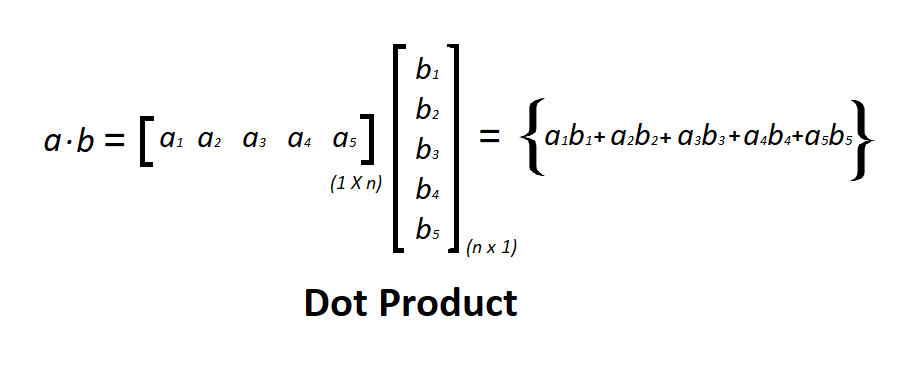

# </center> Example: using `/` instead of `compute_reciprocals`<center>
    
* The operation `/` is NumPy's universal function for division.
* can be applied directly to arrays to compute reciprocals without any loops. That is, it's a vectorised operation.    

In [ ]:
print(compute_reciprocals(values))
print(1.0 / values)

* How much faster did we get? 

* Looking at the execution time for our big array `big_array`, we see that it completes *orders of magnitude faster* than the Python loop:

In [ ]:
%timeit (1.0 / big_array)

About 700x faster that `compute_reciprocals`.

# <center> But why is vectorisation so much faster? </center>

Roughly speaking, the key technical factors are:

1. **No dynamic typing overhead** from Python `for` loops: 
    * we save time by avoiding dynamic type-checking, dynamic dispatches, etc.


2. **Parallelisation**

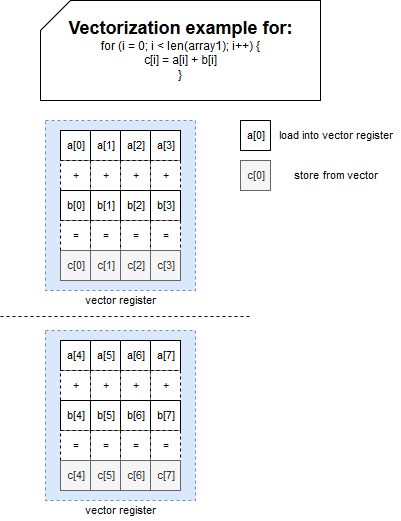

2. **Parallelisation** (continued): 
    * when we're applying the same operation independently to each element of an array, e.g. when computing reciprocals, we don't need to perform operations sequentially (in order). 
    * We can perform them independently of each other, in parallel, and then put back the result! 
    * Modern computers allow to operate on several items at once. Each core in a modern computer can work on a sub-part of an array. 
    * A multi-core computer operates on all sub-parts simultaneously. As the computations are done in parallel, with $n$ cores, we essentially divide the computation time by $n$.

3. **Locality**:
    * The objects in a Python list may be stored in parts of memory that are far apart from each other, and just fetching the data from such locations takes time. NumPy makes sure to put all relevant data into the same area of memory. 

# <center> The practical take-away on vectorisation </center>

* Avoid Python loops when possible. 

* Always try to take advantage of NumPy's universal functions and vectorisation.

* It's not always easy to see how a data manipulation task could be formulated using vectorisation, avoiding loops. This is an important skill to acquire, since it can yield huge speed-ups.